In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [7]:
df = pd.read_csv('DATASET\Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Missing values in each column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


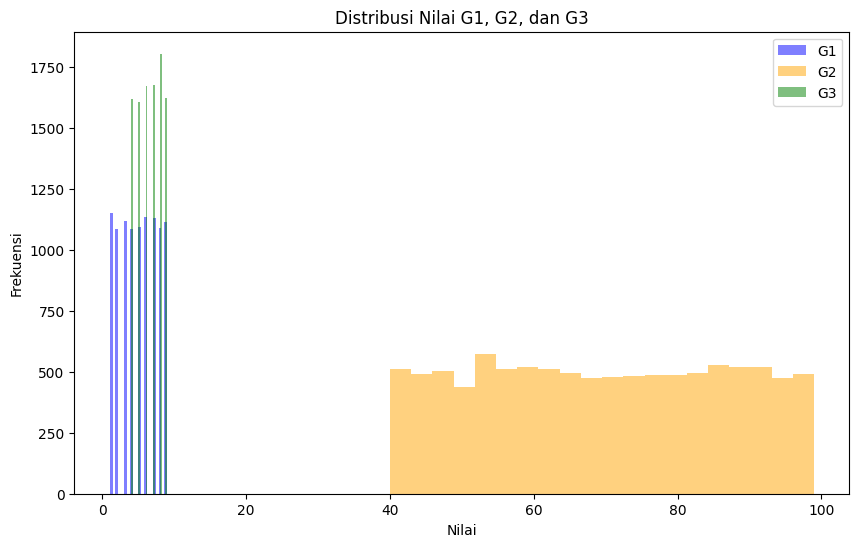

In [ ]:
# cek apakah ada missing value
print("Missing values in each column:")
print(df.isnull().sum())

# Exploratory Data Analysis

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
plt.style.use('default')
sns.set_palette("husl")

#informasi dasar dataset
print("Dataset Info:")
print(f"shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nStatistical Summary:")
print(df.describe())

Dataset Info:
shape: (10000, 6)
Columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

Data types:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Statistical Summary:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Samp

Numeric columns: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
Categorical columns: ['Extracurricular Activities']


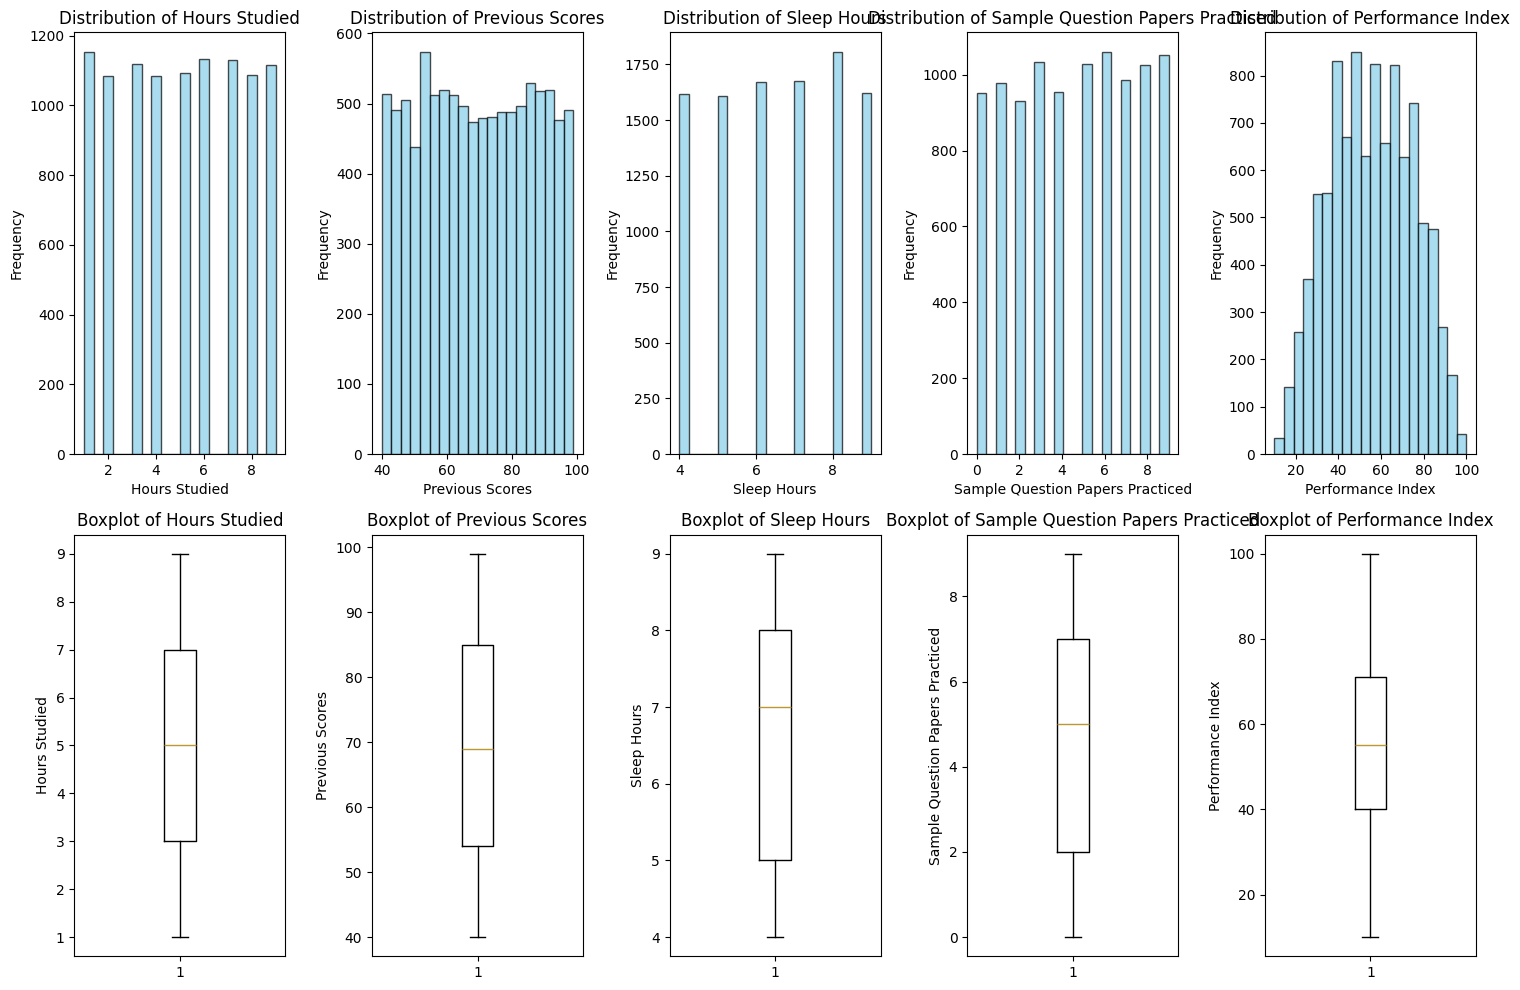

In [12]:
# identifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_columns)

#visualisasi distribusi kolom numerik
if len(numeric_cols) > 0 :
    fig, axes = plt.subplots(nrows = 2, ncols = len(numeric_cols), figsize=(15, 10))

    if len(numeric_cols) == 1:
        axes = axes.reshape(2,1)
    
    for i, col in enumerate(numeric_cols):
        #histogram
        axes[0, i].hist(df[col], bins = 20, alpha = 0.7, color = 'skyblue', edgecolor = 'black')
        axes[0, i].set_title(f'Distribution of {col}')
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Frequency')

        #boxplot
        axes[1, i].boxplot(df[col])
        axes[1,i].set_title(f'Boxplot of {col}')
        axes[1, i].set_ylabel(col)

    plt.tight_layout()
    plt.show()


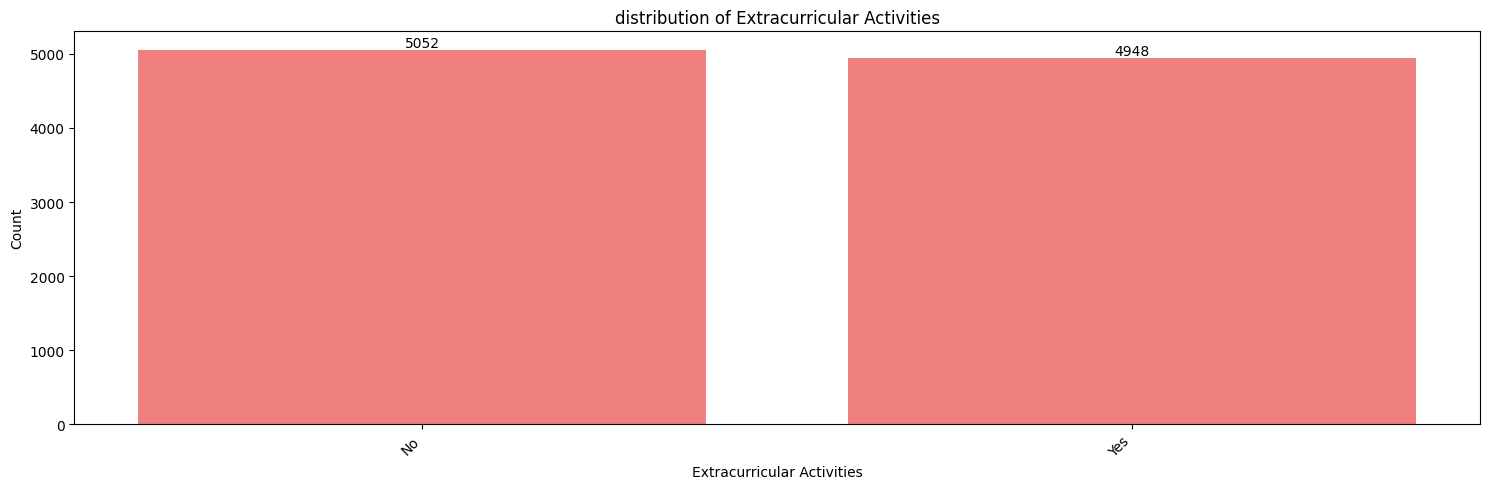

In [13]:
# Visualisasi untuk kolom kategorikal
if len(categorical_columns) > 0:
    n_cols = min(3, len(categorical_columns))
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

    fig,axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 5*n_rows))

    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    for i, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()

        #bar plot
        axes[i].bar(range(len(value_counts)), value_counts.values, color ='lightcoral')
        axes[i].set_title(f"distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
         # Tambahkan nilai di atas bar
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + 0.5, str(v), ha='center', va='bottom')
    
    # Hide extra subplots
    for i in range(len(categorical_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


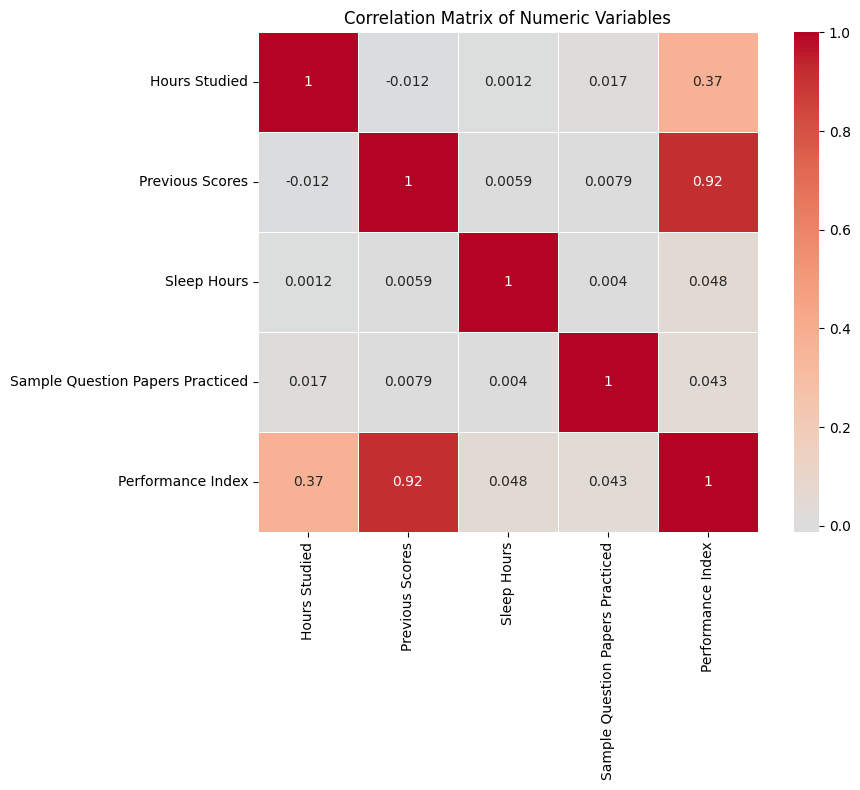

In [14]:
# Correlation matrix untuk kolom numerik
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

In [20]:
# Pair plot untuk melihat hubungan antar variabel numerik
if len(numeric_cols) > 1 and len(numeric_cols) <= 4:
    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
    plt.tight_layout()
    plt.show()

In [18]:
# Analisis outliers menggunakan IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Analysis:")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    if len(outliers) > 0:
        print(f"  Outlier percentage: {len(outliers)/len(df)*100:.2f}%")

Outlier Analysis:

Hours Studied:
  Number of outliers: 0
  Lower bound: -3.00
  Upper bound: 13.00

Previous Scores:
  Number of outliers: 0
  Lower bound: 7.50
  Upper bound: 131.50

Sleep Hours:
  Number of outliers: 0
  Lower bound: 0.50
  Upper bound: 12.50

Sample Question Papers Practiced:
  Number of outliers: 0
  Lower bound: -5.50
  Upper bound: 14.50

Performance Index:
  Number of outliers: 0
  Lower bound: -6.50
  Upper bound: 117.50


# Data Preprocessing

In [21]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== DATA PREPROCESSING ===")

# Identifikasi target variable (asumsi Performance_Index adalah target)
# Sesuaikan dengan nama kolom target yang sebenarnya di dataset Anda
target_column = 'Performance_Index'  # Ganti dengan nama kolom target yang sesuai
if target_column not in df.columns:
    # Jika tidak ada Performance_Index, gunakan kolom numerik terakhir sebagai target
    target_column = numeric_cols[-1]
    print(f"Using '{target_column}' as target variable")

print(f"Target variable: {target_column}")

=== DATA PREPROCESSING ===
Using 'Performance Index' as target variable
Target variable: Performance Index


In [22]:
# Handle missing values
print(f"\nMissing values before preprocessing:")
print(df.isnull().sum())

# Fill missing values untuk numerical columns dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing values untuk categorical columns dengan mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print(f"\nMissing values after preprocessing:")
print(df.isnull().sum())


Missing values before preprocessing:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Missing values after preprocessing:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [23]:
# Handle outliers (optional - dapat diaktifkan jika diperlukan)
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Uncomment baris berikut jika ingin menghapus outliers
# df_clean = remove_outliers_iqr(df, numeric_cols)
# print(f"Data shape after outlier removal: {df_clean.shape}")

df_clean = df.copy()  # Gunakan data original tanpa menghapus outliers
print(f"Using original data shape: {df_clean.shape}")

Using original data shape: (10000, 6)


In [24]:
# Encode categorical variables
df_encoded = df_clean.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nDataset shape after encoding: {df_encoded.shape}")
print("\nEncoded dataset info:")
print(df_encoded.dtypes)

Encoded Extracurricular Activities: {'No': np.int64(0), 'Yes': np.int64(1)}

Dataset shape after encoding: (10000, 6)

Encoded dataset info:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [25]:
# Prepare features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Features shape: (10000, 5)
Target shape: (10000,)

Feature columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

Train set shape: (8000, 5)
Test set shape: (2000, 5)


In [26]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Feature means after scaling: {X_train_scaled.mean(axis=0)}")
print(f"Feature std after scaling: {X_train_scaled.std(axis=0)}")

Feature scaling completed!
Feature means after scaling: [ 2.84217094e-17 -3.32178729e-16  5.15143483e-17  1.36779477e-16
 -8.17124146e-17]
Feature std after scaling: [1. 1. 1. 1. 1.]


# Training Model

In [27]:
# Model Training dan Evaluasi
print("\n=== MODEL TRAINING & EVALUATION ===")

# Dictionary untuk menyimpan model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Train dan evaluate setiap model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Gunakan scaled data untuk semua model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Evaluasi
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Simpan hasil
    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Model': model
    }
    
    print(f"{name} Results:")
    print(f"  Train MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")


=== MODEL TRAINING & EVALUATION ===

Training Linear Regression...
Linear Regression Results:
  Train MSE: 4.1697
  Test MSE: 4.0826
  Train R²: 0.9887
  Test R²: 0.9890

Training Random Forest...
Random Forest Results:
  Train MSE: 0.9367
  Test MSE: 5.1719
  Train R²: 0.9975
  Test R²: 0.9860

Training Decision Tree...
Decision Tree Results:
  Train MSE: 0.2564
  Test MSE: 8.7701
  Train R²: 0.9993
  Test R²: 0.9763

Training Support Vector Regression...
Support Vector Regression Results:
  Train MSE: 5.2848
  Test MSE: 5.4206
  Train R²: 0.9857
  Test R²: 0.9854



=== MODEL COMPARISON ===
                          Train MSE  Test MSE Train MAE  Test MAE  Train R²  \
Linear Regression          4.169736  4.082628  1.619305  1.611121   0.98869   
Random Forest              0.936746  5.171924  0.746137  1.816016  0.997459   
Decision Tree              0.256375  8.770069  0.139458  2.334583  0.999305   
Support Vector Regression  5.284777   5.42064  1.782432  1.823624  0.985665   

                            Test R²  
Linear Regression          0.988983  
Random Forest              0.986044  
Decision Tree              0.976335  
Support Vector Regression  0.985373  


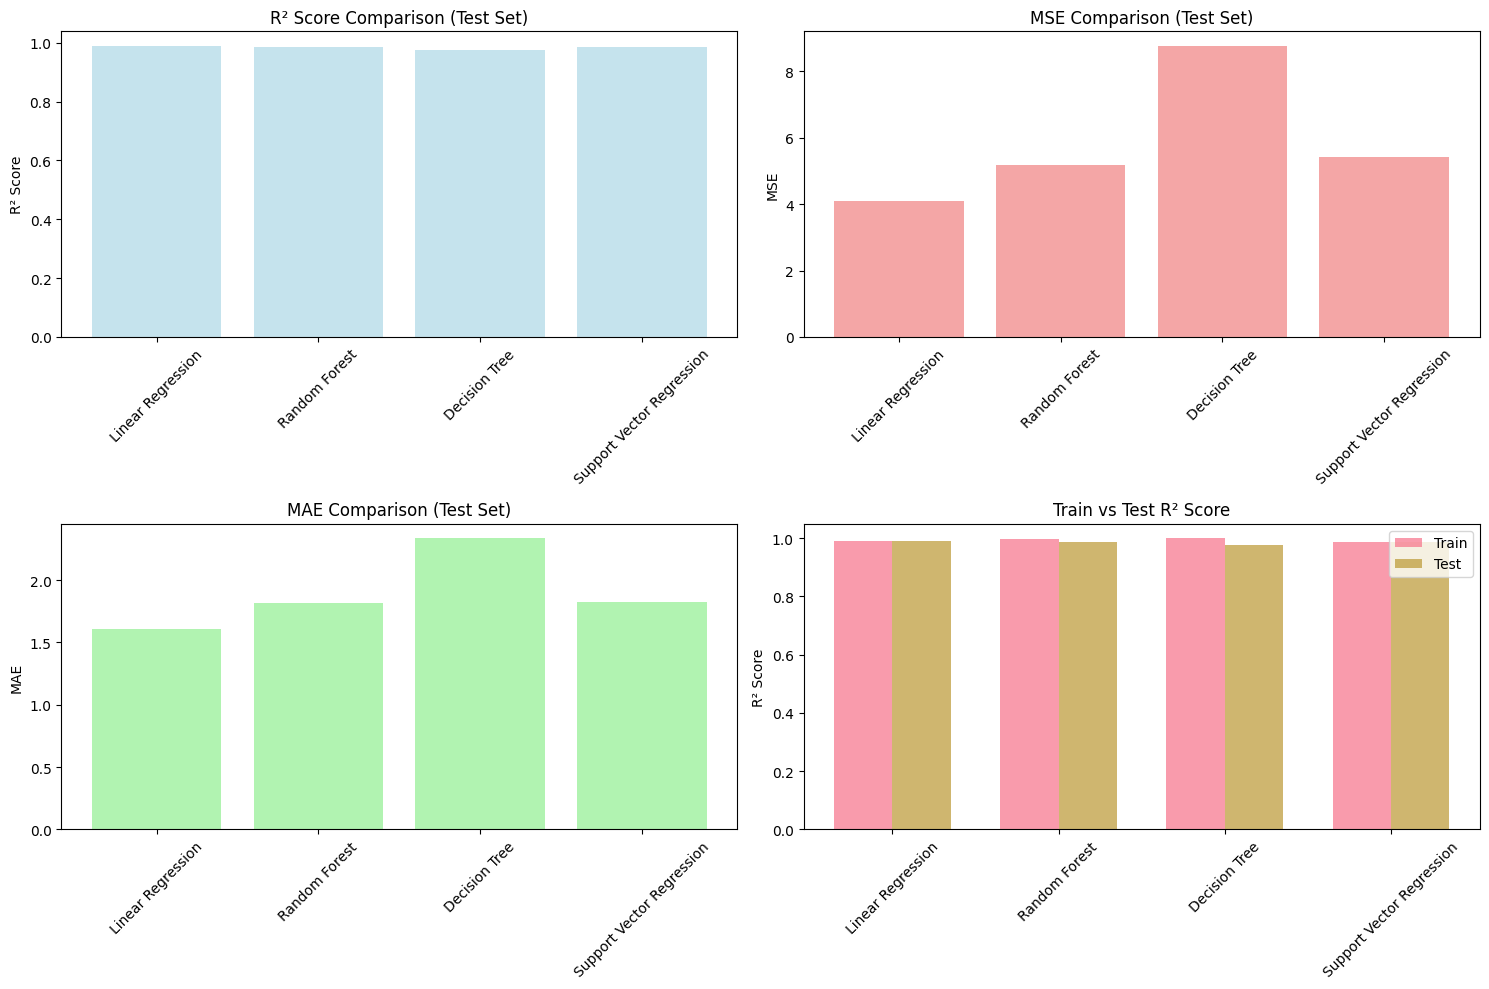

In [28]:
# Comparison Table
print("\n=== MODEL COMPARISON ===")
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.drop('Model', axis=1)
comparison_df = comparison_df.round(4)

print(comparison_df)

# Visualisasi perbandingan model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² Score comparison
axes[0, 0].bar(comparison_df.index, comparison_df['Test R²'], color='lightblue', alpha=0.7)
axes[0, 0].set_title('R² Score Comparison (Test Set)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# MSE comparison
axes[0, 1].bar(comparison_df.index, comparison_df['Test MSE'], color='lightcoral', alpha=0.7)
axes[0, 1].set_title('MSE Comparison (Test Set)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1, 0].bar(comparison_df.index, comparison_df['Test MAE'], color='lightgreen', alpha=0.7)
axes[1, 0].set_title('MAE Comparison (Test Set)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Train vs Test R² Score
x_pos = np.arange(len(comparison_df.index))
width = 0.35
axes[1, 1].bar(x_pos - width/2, comparison_df['Train R²'], width, label='Train', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, comparison_df['Test R²'], width, label='Test', alpha=0.7)
axes[1, 1].set_title('Train vs Test R² Score')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(comparison_df.index, rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [29]:
# Best model selection
best_model_name = comparison_df['Test R²'].idxmax()
best_model = results[best_model_name]['Model']

print(f"\n=== BEST MODEL ===")
print(f"Best model: {best_model_name}")
print(f"Test R² Score: {comparison_df.loc[best_model_name, 'Test R²']:.4f}")
print(f"Test MSE: {comparison_df.loc[best_model_name, 'Test MSE']:.4f}")
print(f"Test MAE: {comparison_df.loc[best_model_name, 'Test MAE']:.4f}")

# Feature importance (jika model mendukung)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop 10 Important Features ({best_model_name}):")
    print(feature_importance.head(10))


=== BEST MODEL ===
Best model: Linear Regression
Test R² Score: 0.9890
Test MSE: 4.0826
Test MAE: 1.6111
